# Preprocessing Voting Record Dataset

In this excercise, you'll be working with a [dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) obtained from the *UCI Machine Learning Repository* consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 

As you'll shortly discover the dataset you'll be working with in this exercise is not the preprocessed dataset from the *UCI Machine Learning Rpository*, but a raw form of this dataset. It contains the same information but they are not in the best form to apply machine learning algorithms.

### Exercise

- Get started by reading the `party_raw.csv` and creating a `DataFrame` using `pandas`.
- Print the first few lines of the DataFrame to check if it worked.

In [ ]:
#Import necessary module
import pandas as pd
import numpy as np

#Read raw party dataset
party_raw = pd.read_csv('party_raw.csv')

#Print first few lines of DataFrame to check if it worked
display(party_raw.head())

,Unnamed: 0,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,republican,no,positive,no,positive,Yes,Yes,negative,No,No,Yes,nah,yep,yeah,yep,nah,Yes
1,1,republican,negative,yeah,nah,Yes,yeah,yes,no,negative,No,Nope,nah,yeah,Yes,Yes,no,positive
2,2,democrat,no,yep,positive,no,Yes,positive,negative,no,nah,negative,yep,No,yep,yep,No,Nope
3,3,democrat,negative,positive,Yes,No,Yes,positive,Nope,no,No,Nope,positive,negative,yes,no,Nope,Yes
4,4,democrat,yes,positive,yes,no,yep,Yes,no,NaN,Nope,nah,yep,No,positive,positive,Yes,positive


# Handling Missing Values

A main problem that will most likely arise when analyzing real world data are missing values. It is advisable to tackle the problem of missing values first, even before other Preprocessing steps, because further transformations are much easier to perform when the data has no missing values.

One way to deal with missing values would be to delete all data points with missing values. But because deleting data points means losing potentially useful information, it is also possible to keep all the samples containing missing values and replace them with a reasonable subsitute like the median, mean or mode.

Fortunately, there is the `sklearn.impute` module that can replace missing values with a specified value. However, the imputer only replaces values that are of type `np.nan`. `NaN` stands for `not a number` and essentially is pandas' way of saying that it could not find a value to read. What in the beginning might have seemed like a bad thing seeing all the `NaN` values in the data is actually not that big of disaster. All of the missing values in the voting dataset seem to have the same form of a `np.nan` which means it can be imputed by utilizing `SimpleImputer`.

### Exercise
- Import `SimpleImputer` from `sklearn`'s `impute` module.
- Print the sum of `nan` values in the dataset by using the DataFrame's `isna()` and `sum()` functions.
- Create a `SimpleImputer` object and pass a fitting central value statistic to its `strategy` argument. *Hint*: All possible imputing strategies can be found in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">documentation</a>.
- Create the feature matrix `X` by dropping the target column `party` from `party_raw`.
- Fit the `SimpleImputer` object on `X` by calling its `.fit()` method.
- Impute missing values by calling the imputer's `.transform()` method on `X`. Save the result to a DataFrame `party_imputed` using `pd.DataFrame`.
- Check if it all worked and pribnt the sum of `NaN` values.


In [27]:
#Import necessary modules
from sklearn.impute import SimpleImputer

#Print the sum of not a number values
print(party_raw.isna().sum().sum())

#Define imputer
imputer = SimpleImputer(strategy='most_frequent')

#Subset Feature Matrix from full dataset
X = party_raw.drop(['party'],axis=1)

#Saving the columns for readability
cols = X.columns

#Fit imputer
imputer.fit(X)

#Transform data
party_imputed = pd.DataFrame(imputer.transform(X),columns=cols)

#Check if it worked by printing sum of number of nans
print(party_imputed.isna().sum().sum())

#Concatenate target column
party_imputed['party'] = party_raw['party']

#Print first few rows
display(party_imputed.head())

72
0


,Unnamed: 0,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa,party
0,0,no,positive,no,positive,Yes,Yes,negative,No,No,Yes,nah,yep,yeah,yep,nah,Yes,republican
1,1,negative,yeah,nah,Yes,yeah,yes,no,negative,No,Nope,nah,yeah,Yes,Yes,no,positive,republican
2,2,no,yep,positive,no,Yes,positive,negative,no,nah,negative,yep,No,yep,yep,No,Nope,democrat
3,3,negative,positive,Yes,No,Yes,positive,Nope,no,No,Nope,positive,negative,yes,no,Nope,Yes,democrat
4,4,yes,positive,yes,no,yep,Yes,no,positive,Nope,nah,yep,No,positive,positive,Yes,positive,democrat


# Transforming Categorical Columns

As you can see, it seems like `party_raw` contains the answers of the interviewees in text form. The problem is even more complicated because the answers are not summarized by intention to a standard value. The features contain different sorts of spelling e.g. `yes` and `Yes` of the same word and synonyms like `yep` or `nah`.

A typical way of dealing with categorical features with more than two values is a transformation called `OneHotEncoding`. It takes the categorical feature of interest as input and creates a binary matrix of multiple columns from it. 

The number of columns of this new binary matrix is determined by the number of unique values in the original categorical feature. The new columns have the same number of rows as the original data and only contain a `1` where the original feature had the value that is now represented by the new column. All the other values are `0`. The resulting binary matrix represents the same information as the original feature but is now processible in every machine learning algorithmn. 

One of the problems that may arise when transforming mutliple categorical features with a lot of different values is the sharp rise in the number of features. By increasing the number of features the risk of suffering the consequences of the `Curse of Dimensionality` may increase too. If you want to now more about this phenomenon, it's implications and how to avoid it, you may want to read Tony Yiu's <a href="https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e"> introduction article </a> about it.

The `pd.get_dummies()` function creates a so called `onehotencoded` binary matrix from a `Pandas.Series` object. Every column of a `Pandas` DataFrame on its own is a `Pandas.Series`. Multiple `Pandas.DataFrames` can be concatenated by calling `pd.concat()` and passing the DataFrames to merge in a list. The other argument that needs to be specified is the argument `axis`, if you want to concatenate the DataFrames horizontally (adding new columns) the passed value for `axis` is `1`. If you want to concatenate the DataFrames vertically (adding new rows) `axis` needs to be `0`.

*Hint:* Make sure that the number of rows/columns of the two DataFrames are equal in the direction in which they are to be merged.

### Exercise

- Apply `pd.get_dummies()` to every column besides the `party` column in the DataFrame that contains the data of `party_raw.csv`. Save the result to a new DataFrame.
- Print the first few rows of the DataFrame containing the result.
- What do you think about the result? What do you think why this kind of preprocessing is not used in the dataset that can be downloaded at the *UCI Machine Learning Repository*. Can you imagine a situation where it might be more reasonable to apply `OneHotEncoding`?


In [28]:
#Define empty DataFrame for transformed result
ohe_party = pd.DataFrame({})

#OneHotEncode all features of raw voting data
for col in party_imputed.columns:

    if col == 'party':
        continue

    temp_transformed = pd.get_dummies(party_imputed[col])
    ohe_party = pd.concat([ohe_party, temp_transformed], axis=1)


#Print the first few rows of the result
display(ohe_party)

,0,1,2,3,4,5,6,7,8,9,...,No,Nope,Yes,nah,negative,no,positive,yeah,yep,yes
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
431,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Zuviele einzelne indviduelle ausprägungen von antworten, die die selbe bedeutung haben.
Nicht wie beim beispiel von farben, wo unterschiedliche ausprägunngen andere inhaltliche bedeutungen haben und auch häufiger vorkommen.
Hier verkompliziert es nur die schwierigkeit des problems und vermindert somit die lösunsqualität des modells.

# Custom Transformations

Because the interview that lead to the creation of the voting dataset obviously consisted of yes/no questions it would be an unnecessary risk to inflate the dataset by `onehotencoding` every single column. The knowledge that one column can only contain information of two states opens the possibility for some costum tranformations. At first you need to know how many unique values of every feature contains.

The next step is to group these values by `negative` or `positive` answer. The last and final step to get to the form of the dataset the *UCI Machine Learning Repository* provides is to transform the group into a corresponding number. `1` for positive feedback and `0` for negative feedback are obvious and the most logical numbers for this transformation.

### Exercise

- Create two lists. One containing every unique value that represents a negative answer (e.g. `No` or `nope`) and the other one containing every unique value representing a positive answer (e.g. `Yes` or `yep`). 
    - *Hint*: Every column has the same unique values representing approval and rejection towards a question.
- Print the two lists.
- Use the two lists to transform the values of a feature to a binary array and concatenate the arrays to create a "computer friendly" representation of the information in the voting dataset.
- Save the transformed dataset to a variable `party_clean` and print the first few rows.

In [29]:
#Imports
import numpy as np

#Create a list of unique values of one of the feature columns
unique_values = party_imputed['religious'].unique()

#Print the list of unique values
print(unique_values)

#Figure out a way to separate the list into positive and negative answers
positive_answers = ['Yes','yes','positive','yep','yeah']
negative_answers = ['Nope','No','negative','nah','no']

#another way
positive_answers = []
negative_answers = []

for str in unique_values:

    first_char = str[0].lower()

    if first_char == "n":
        negative_answers.append(str)
    else:
        positive_answers.append(str)

#...and so on - everything that works is correct

#Print the subsets you created
print(positive_answers)
print(negative_answers)

#Transform the values of every column of the raw voting data and store it in a new DataFrame
party_clean = pd.DataFrame({})
for col in party_imputed.columns:

    if col == 'party':
        party_clean['party'] = party_imputed[col].copy(deep=True)
        continue

    temp_new_val = []

    for i in range(len(party_imputed)):

        val = party_imputed[col].iloc[i]

        if val in positive_answers:

            temp_new_val.append(1)
        
        else:

            temp_new_val.append(0)
    
    party_clean[col] = np.array(temp_new_val)

#everything that works is correct

#Print the result
display(party_clean.head())

['Yes' 'yes' 'positive' 'yep' 'Nope' 'yeah' 'No' 'negative' 'nah' 'no']
['Yes', 'yes', 'positive', 'yep', 'yeah']
['Nope', 'No', 'negative', 'nah', 'no']


,Unnamed: 0,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa,party
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,democrat
4,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,democrat


# K-Nearest Neighbor Classification

As said in the introductional text of this exercise. The goal of the analysis is predicting what an individual will vote for given the answers of this individual. That is, the target variable of the analysis to be performed is `party`. Since `party` is a categorical feature it is a classifiation problem. The `KNN` algorithmn determines the class of a given individual by the classes of its `n` nearest neighbors.

`KNN` needs a measure of distance to determine whether a datapoint is `near` which means it is relevant for a classification or `far` which lowers its importance in a classification or even makes it irrelevant. 

The measures of distance are different for every feature depending on its level of scale. But because scikit-learn provides a `KNeighborsClassifier` in its `neighbors` module. It can be used to fit a KNN-Classification model to a given dataset.

Before fitting the KNN-Classifier to the data, it is advisable to split the data into at least two subsets. One of those subsets (typically with more data) is the subset will be shown to the model to base the predictions on. It is also called training data. The other subset (typically much smaller in size) is called testset and is used to determine the performance of the trained model on unseen data.

Most of the time the important measure of success is the perfomance of a model on the test data because these scores are most likely the scores that represent the model perfomance in a (later) real world application on new data. But also the results on the training data are important to be able to identify if a model might be over- or underfitted.

The `sklearn.model_selection.train_test_split` function will output four variables containing the dedicated feature matrices and target vectors for training and testset. It will also shuffle the data before dividing the dataset into the two subsets.

### Exercise
- Import `KNNeighborsClassifier` from `sklearn.neighbors`, `train_test_split` from sklearn's `model_selection` as well as `classification_report` and `confusion_matrix` from `sklearn.metrics`
- Import `seaborn` and `matplotlib.pyplot`.
- Seperate Feature matrix and target vector by dropping `party` from the dataframe and assigning it to `X` as well as assigning the party column to `y`.
- Create training and test set by passing `X` and `y` to `train_test_split`. Set `test_size` to `0.2` to make the test set 20% and the training set 80 % of the original dataset.
- Create a the object `knn` using `KNNeighborsClassifier` pass `3` to the `n_neighbors` argument.
- Fit the `knn` object to `X_train` and `y_train` utilizing its `.fit()` method.
- Calculate predictions for the test data by calling `knn`'s `.predict()` on `X_test`. Save the predictions to a variable `y_pred`.
- Calculate the `confusion_matrix` on the test data passing `y_test` and `y_pred`. Store it in a new variable `cm`.
- Print out the `classification_report` on the test set.
- Calculate the log of `cm` and draw a `seaborn.heatmap`.
- Give the plot a fitting title and display it.

[[56  4]
 [ 3 24]]
              precision    recall  f1-score   support

    democrat       0.95      0.93      0.94        60
  republican       0.86      0.89      0.87        27

    accuracy                           0.92        87
   macro avg       0.90      0.91      0.91        87
weighted avg       0.92      0.92      0.92        87



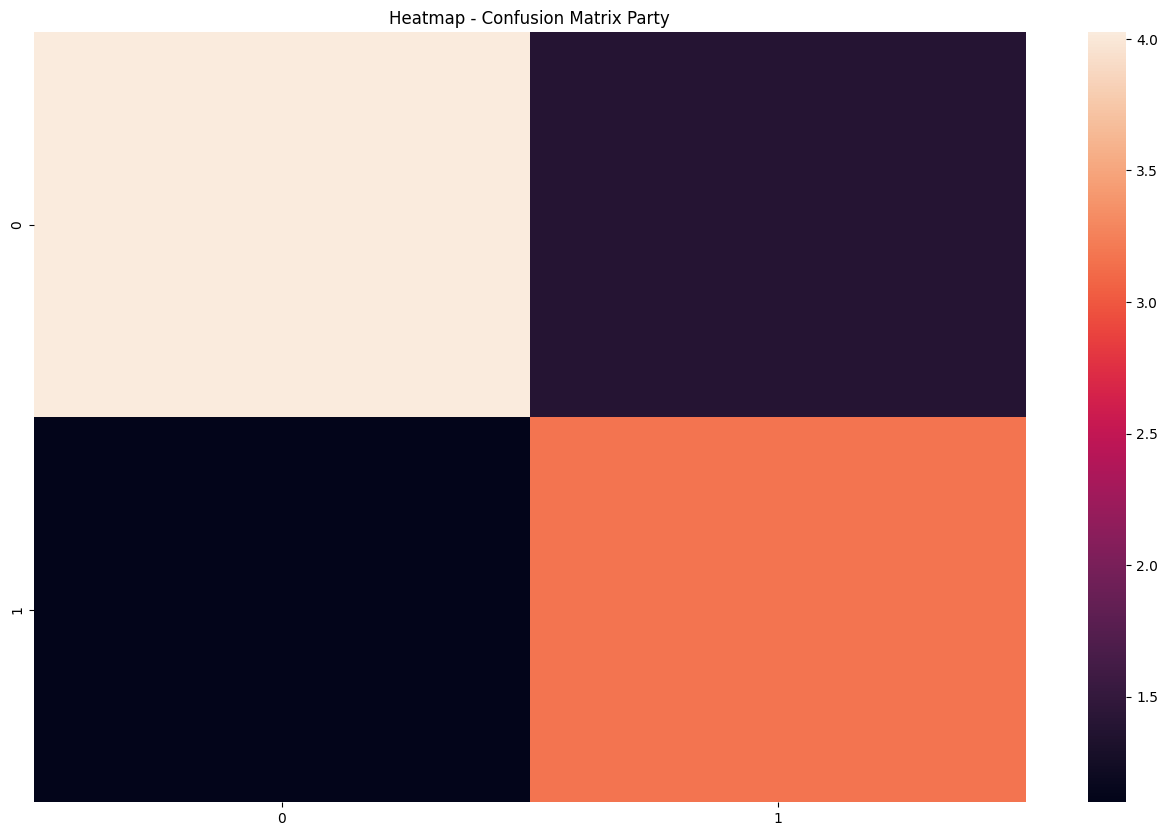

In [30]:
#Import necessary modules and packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Create feature matrix
X = party_clean.drop(['party'],axis = 1)

#Create target vector
y = party_clean['party']

#Split feature matrix and target vector into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Create KNN-Object
knn = KNeighborsClassifier(n_neighbors=3)

#Fit KNN-Classifier to training data
knn.fit(X_train,y_train)

#Predict test set
y_pred = knn.predict(X_test)

#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Print confusion matrix
print(cm)

#Print classification report
print(classification_report(y_test, y_pred))

#Create Heatmap of Confusion matrix on Test Set
plt.figure(figsize=(16,10))
plt.title("Heatmap - Confusion Matrix Party")
sns.heatmap(np.log(cm))
plt.show()


### Exercise

- Import `DecisionTreeClassifier` from `sklearn.ensemble`.
- Create a `DecisionTreeClassifier` object.
- Fit the `DecisionTreeClassifier` to the training data and predict the test feature matrix.
- Calculate the confusion matrix and save it to a variable.
- Print out the classification report.
- Visualize the logrithmn of the confusion matrix in a plot.
- Can you spot any differences in the performance of the two models?
- Is there a way you can think of that would possibly improve performance of one of the models?

[[58  2]
 [ 6 21]]
              precision    recall  f1-score   support

    democrat       0.91      0.97      0.94        60
  republican       0.91      0.78      0.84        27

    accuracy                           0.91        87
   macro avg       0.91      0.87      0.89        87
weighted avg       0.91      0.91      0.91        87



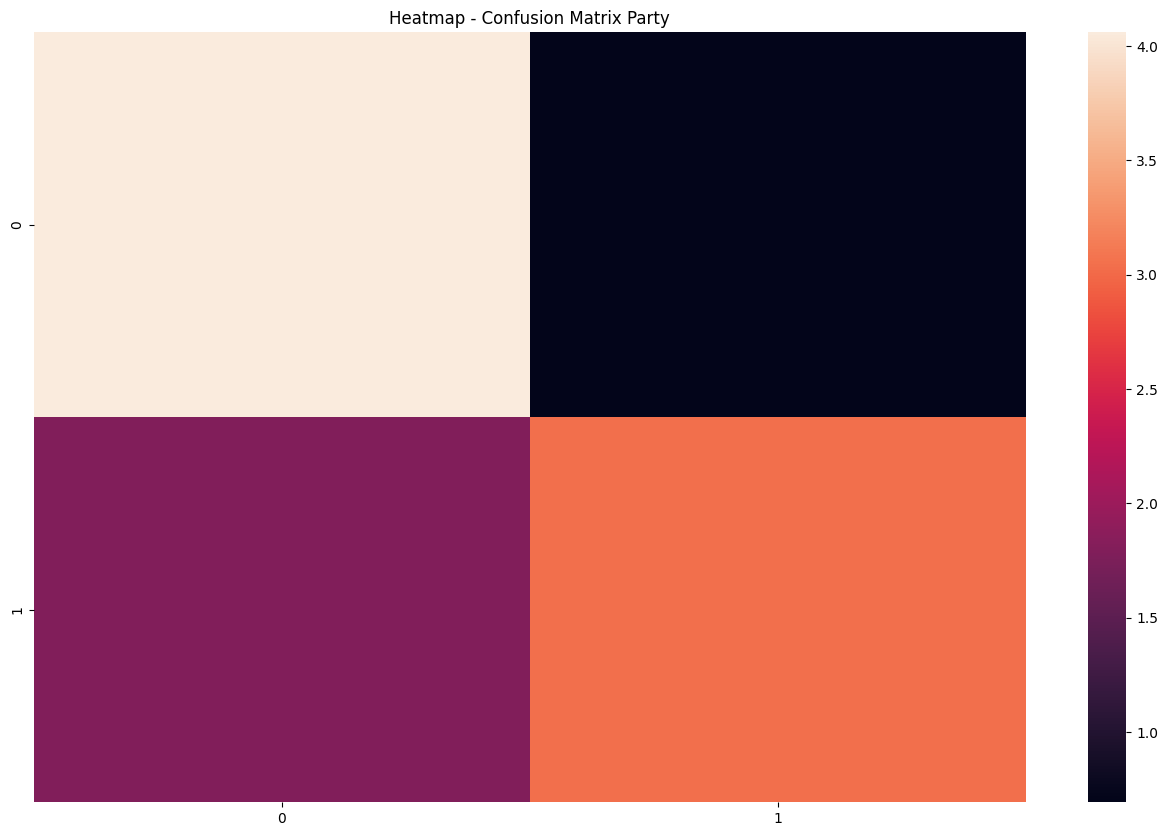

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

#Print the Confusion Matrix and classification report
print(cm)
print(classification_report(y_test, y_pred))


#Create Heatmap of Confusion matrix on Test Set
plt.figure(figsize=(16,10))
plt.title("Heatmap - Confusion Matrix Party")
sns.heatmap(np.log(cm))
plt.show()


Das 2. Modell (Decision Tree) performt bei demokraten schlechter, bei republikanern besser.
Beim 1. Modell (Knn) waren insgesamt weniger falsche predictions.
Verbesserung eventuell durch anpassung der Parameter und entsprechender Evaluation.
(Eventuell auch mal testen wie's ohne log aussieht.)

